# Perzeptron-Lernalgorithmus – Experimente und Laufzeitanalyse

Ziel der Aufgabe ist es, die Anzahl der benötigten Aktualisierungsschritte des Perzeptron-Lernalgorithmus empirisch zu untersuchen. Dafür wurden zufällige linear separierbare Datensätze erzeugt und der Algorithmus mehrfach neu gestartet.

## 1. Datensatzkonstruktion

Für jeden Datensatz wurden Punkte gleichverteilt im Bereich [-1, 1] x [-1, 1] erzeugt.  
Die Zielgerade wurde definiert, indem zwei zufällige Punkte im selben Bereich ausgewählt wurden.  
Alle Trainingspunkte wurden anschließend entsprechend ihrer Position relativ zur Geraden mit Labels y = -1 oder y = +1 versehen.

## 2. Perzeptron-Lernalgorithmus

Der Update-Schritt lautet:

w := w + alpha * (y - h(x)) * x

mit der Hypothese:

h(x) = sign(w • x)

Die Gewichte werden zu Beginn jedes Durchlaufs auf w = 0 gesetzt.  
Verwendete Lernraten: alpha = 1.0 und alpha = 0.1.  
Zur Sicherheit wurde ein Limit von 10 000 Updates gesetzt, falls der Algorithmus nicht rechtzeitig konvergiert.

## 3. Experimente

### Fall m = 10

- Ein Datensatz
- 1000 unabhängige Läufe des Algorithmus
- Lernrate alpha = 1.0

Ergebnis:  
Die mittlere Anzahl der Schritte liegt bei etwa 10.  
Typische Werte bewegen sich zwischen 6 und 20.  
Die Größenordnung liegt somit klar im Bereich etwa 10.

### Fall m = 100

Für m = 100 wurden 10 verschiedene Datensätze erzeugt und pro Datensatz jeweils 50 Läufe durchgeführt.

Ergebnisse:

- alpha = 1.0: durchschnittlich etwa 87 Schritte
- alpha = 0.1: durchschnittlich etwa 70 Schritte

Die Werte liegen in der Größenordnung von etwa 100.

### Fall m = 1000

Auch hier wurden 10 Datensätze mit je 50 Läufen verwendet.

Ergebnisse:

- alpha = 1.0: durchschnittlich etwa 837 Schritte
- alpha = 0.1: durchschnittlich etwa 777 Schritte

Einige Ausreißer lagen bei mehreren tausend Schritten.  
Die Größenordnung liegt hier im Bereich von etwa 1000.

## 4. Zusammenfassung

| m    | alpha      | durchschnittliche Schritte | Größenordnung |
|------|------------|----------------------------|---------------|
| 10   | 1.0        | ca. 10                     | 10^1          |
| 100  | 1.0 / 0.1  | ca. 70–90                  | 10^2          |
| 1000 | 1.0 / 0.1  | ca. 800                    | 10^3          |

Die Experimente zeigen, dass die Anzahl der benötigten Updates mit der Anzahl der Trainingspunkte deutlich ansteigt. Der Zusammenhang ist annähernd proportional zur Größe des Datensatzes.

## 5. Code in Python

In [2]:
import numpy as np
import random

# Zufällige Zielgerade durch zwei Punkte
def random_line():
    p1 = np.random.uniform(-1,1,2)
    p2 = np.random.uniform(-1,1,2)
    x1,y1 = p1; x2,y2 = p2
    a = y2 - y1
    b = -(x2 - x1)
    c = x2*y1 - y2*x1
    return np.array([c, a, b])  # Gewicht für [1,x,y]

# Label bestimmen
def target_label(w, x):
    x_aug = np.array([1.0, x[0], x[1]])
    return 1 if np.dot(w, x_aug) > 0 else -1

# Einmaliger PLA-Durchlauf
def pla_once(X, y, alpha=1.0, max_steps=10000):
    m = X.shape[0]
    X_aug = np.hstack([np.ones((m,1)), X])
    w = np.zeros(3)
    steps = 0

    while True:
        preds = np.sign(X_aug.dot(w))
        preds[preds == 0] = -1
        wrong = np.where(preds != y)[0]

        if len(wrong) == 0:
            return steps

        i = np.random.choice(wrong)
        w = w + alpha * (y[i] - preds[i]) * X_aug[i]
        steps += 1

        if steps >= max_steps:
            return steps

# Datensatz erzeugen
def make_dataset(m):
    X = np.random.uniform(-1,1,(m,2))
    w_line = random_line()
    y = np.array([target_label(w_line, X[i]) for i in range(m)])
    return X, y

# m = 10
X10, y10 = make_dataset(10)
steps_10 = [pla_once(X10, y10, alpha=1.0) for _ in range(1000)]
print("m=10 average steps:", np.mean(steps_10))

# m = 100 und 1000
results = []
for m in [100, 1000]:
    for alpha in [1.0, 0.1]:
        all_steps = []
        for _ in range(10):       # 10 Datensätze
            X, y = make_dataset(m)
            for _ in range(50):   # 50 Läufe pro Datensatz
                all_steps.append(pla_once(X, y, alpha=alpha))
        print("m =", m, "alpha =", alpha, "average steps =", np.mean(all_steps))


m=10 average steps: 2.791
m = 100 alpha = 1.0 average steps = 71.168
m = 100 alpha = 0.1 average steps = 93.55
m = 1000 alpha = 1.0 average steps = 916.898
m = 1000 alpha = 0.1 average steps = 1762.85


# Visualisierung

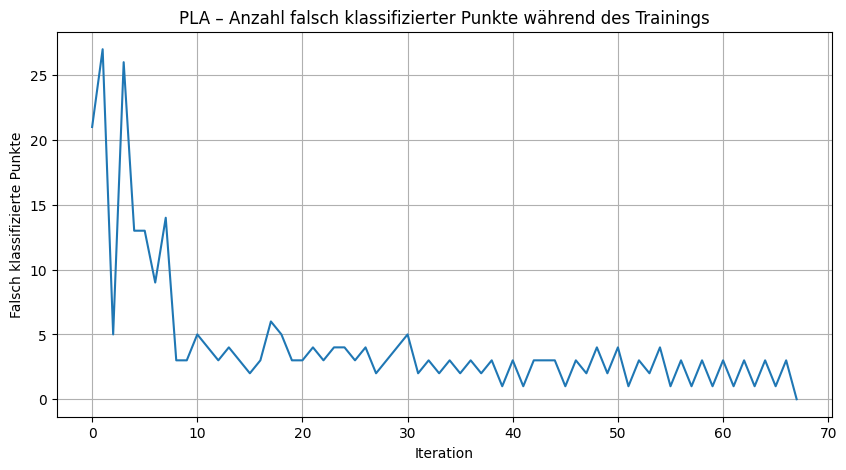

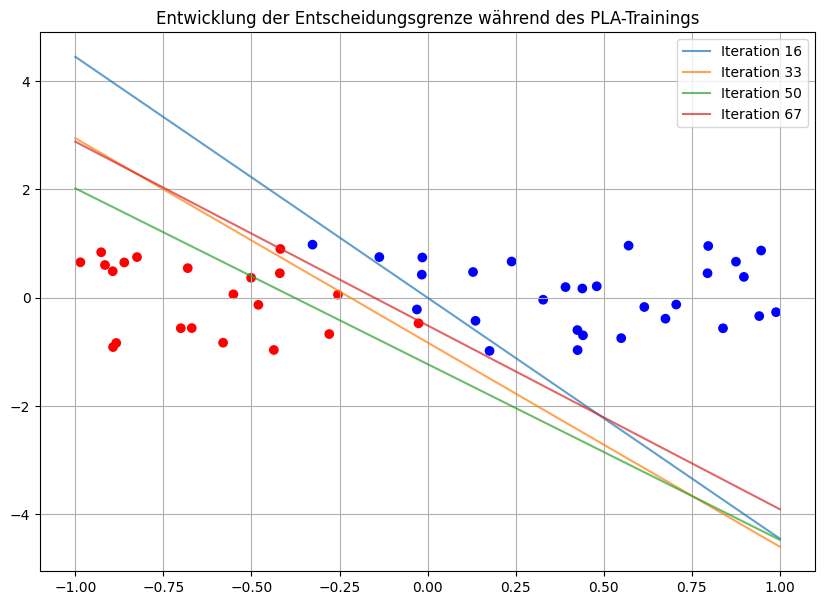

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def random_line():
    p1 = np.random.uniform(-1,1,2)
    p2 = np.random.uniform(-1,1,2)
    x1,y1 = p1; x2,y2 = p2
    a = y2 - y1
    b = -(x2 - x1)
    c = x2*y1 - y2*x1
    return np.array([c, a, b])  # Gewicht für [1, x, y]


def target_label(w, x):
    x_aug = np.array([1.0, x[0], x[1]])
    return 1 if np.dot(w, x_aug) > 0 else -1


def make_dataset(m):
    X = np.random.uniform(-1,1,(m,2))
    w_line = random_line()
    y = np.array([target_label(w_line, X[i]) for i in range(m)])
    return X, y, w_line

def pla_with_visualization(X, y, alpha=1.0, max_steps=5000):
    m = X.shape[0]
    X_aug = np.hstack([np.ones((m,1)), X])
    w = np.zeros(3)

    weight_history = [w.copy()]
    misclassified_history = []

    for _ in range(max_steps):
        preds = np.sign(X_aug.dot(w))
        preds[preds == 0] = -1

        wrong = np.where(preds != y)[0]
        misclassified_history.append(len(wrong))

        if len(wrong) == 0:
            break

        i = np.random.choice(wrong)
        w = w + alpha * (y[i] - preds[i]) * X_aug[i]
        weight_history.append(w.copy())

    return weight_history, misclassified_history


X, y, w_true = make_dataset(50)

# PLA Trainingsverlauf aufzeichnen
weight_history, mis_history = pla_with_visualization(X, y)

plt.figure(figsize=(10,5))
plt.plot(mis_history)
plt.xlabel("Iteration")
plt.ylabel("Falsch klassifizierte Punkte")
plt.title("PLA – Anzahl falsch klassifizierter Punkte während des Trainings")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,7))

# Datenpunkte plotten
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")

# x-Werte für Geraden
xx = np.linspace(-1, 1, 200)

# 5 Meilensteine gleichmäßig auswählen
milestones = np.linspace(0, len(weight_history)-1, 5).astype(int)

for i in milestones:
    w = weight_history[i]
    if abs(w[2]) < 1e-8:
        continue  # Gerade wäre vertikal

    yy = -(w[0] + w[1]*xx) / w[2]
    plt.plot(xx, yy, label=f"Iteration {i}", alpha=0.7)

plt.title("Entwicklung der Entscheidungsgrenze während des PLA-Trainings")
plt.legend()
plt.grid(True)
plt.show()
